<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498121 non-null  int64  
 1   totalScanTimeInSeconds     498121 non-null  int64  
 2   grandTotal                 498121 non-null  float64
 3   lineItemVoids              498121 non-null  int64  
 4   scansWithoutRegistration   498121 non-null  int64  
 5   quantityModification       498121 non-null  int64  
 6   scannedLineItemsPerSecond  498121 non-null  float64
 7   valuePerSecond             498121 non-null  float64
 8   lineItemVoidsPerPosition   498121 non-null  float64
 9   fraud                      498121 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 38.0 MB
None
          trustLevel  totalScanTimeInSeconds     grandTotal  lineItemVoids  \
count  498121.000000           498121.000000  498121.000000  498121.000

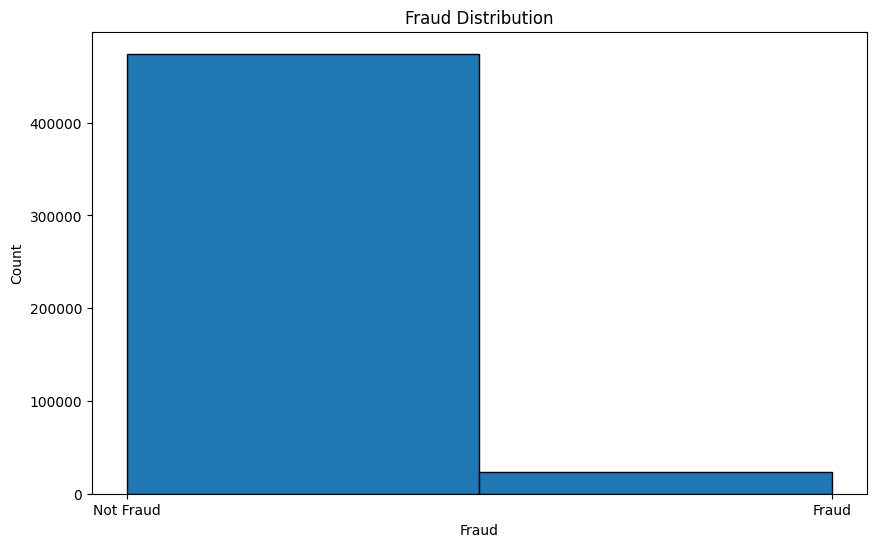

Logistic Regression Accuracy: 0.9842
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     94850
           1       0.87      0.78      0.83      4775

    accuracy                           0.98     99625
   macro avg       0.93      0.89      0.91     99625
weighted avg       0.98      0.98      0.98     99625



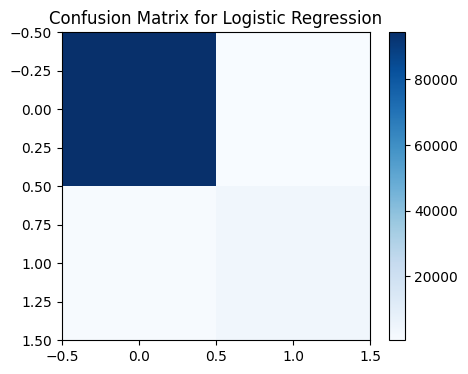

Random Forest Accuracy: 0.9963
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94850
           1       0.97      0.96      0.96      4775

    accuracy                           1.00     99625
   macro avg       0.98      0.98      0.98     99625
weighted avg       1.00      1.00      1.00     99625



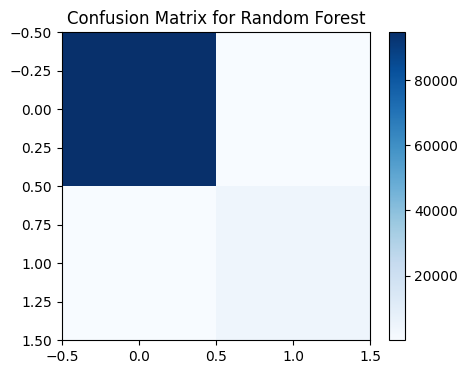

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("Fraud Original Full.csv")

# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print(f"Missing Values:\n{df.isnull().sum()}")


# Handling missing values (Simple Imputation with Mean/Median)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
plt.hist(df['fraud'], bins=2, edgecolor='black')
plt.xticks([0, 1], labels=['Not Fraud', 'Fraud'])
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Fraud Distribution')
plt.show()

# Feature Selection
features = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
            'scansWithoutRegistration', 'quantityModification', 'scannedLineItemsPerSecond',
            'valuePerSecond', 'lineItemVoidsPerPosition']
X = df[features]
y = df['fraud']

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(5, 4))
    plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues', interpolation='nearest')
    plt.title(f'Confusion Matrix for {name}')
    plt.colorbar()
    plt.show()

# Selecting Best Model for Deployment (based on Accuracy & Recall)
# Further tuning and optimization can be done using GridSearchCV or Hyperparameter tuning
